Naive Bayes assumes each feature contributes independently to the probability of each class.

Works very well for high-dimensional tabular data

In [7]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#defining input and target classes
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #randomly splits data into training and testing sets


In [8]:
df = pd.read_csv(r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\processed\tabular_data\brain_tumor_dataset.csv")

In [9]:

X = df.drop(columns = ['Patient_ID', 'Histology'])
#input features
y = df['Histology']
# target variable

#Encode Y to convert to numbers for easier classification
le = LabelEncoder()
y = le.fit_transform(y)

#converts each categorical column into multiple binary columns
X = pd.get_dummies(X, drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    #test size of 20%
    random_state=42,  
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

#checking the distribution of classes in training and test sets

Training set size: (16000, 27)
Test set size: (4000, 27)


In [11]:
# Initialize and train
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
# Predict
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

print(y_pred_test[:20])  # Shows the first 10 predictions

for actual, predicted in zip(y_test[:20], y_pred_test[:20]):
    print(f"Actual: {actual}, Predicted: {predicted}")

[3 3 0 0 1 1 3 0 1 1 0 3 3 2 3 2 2 2 0 2]
Actual: 3, Predicted: 3
Actual: 0, Predicted: 3
Actual: 2, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 3, Predicted: 1
Actual: 0, Predicted: 3
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 2, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 3
Actual: 1, Predicted: 3
Actual: 0, Predicted: 2
Actual: 3, Predicted: 3
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 3, Predicted: 2
Actual: 1, Predicted: 0
Actual: 0, Predicted: 2


In [13]:
#evaluate model performance
train_acc = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Naïve Bayes Training Accuracy: {train_acc:.4f}")
print(f"Naïve Bayes Test Accuracy: {acc_test:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=le.classes_))

Naïve Bayes Training Accuracy: 0.2700
Naïve Bayes Test Accuracy: 0.2502

Classification Report:
                  precision    recall  f1-score   support

    Astrocytoma       0.23      0.24      0.24       987
   Glioblastoma       0.26      0.29      0.28      1014
Medulloblastoma       0.25      0.23      0.24       996
     Meningioma       0.26      0.24      0.25      1003

       accuracy                           0.25      4000
      macro avg       0.25      0.25      0.25      4000
   weighted avg       0.25      0.25      0.25      4000



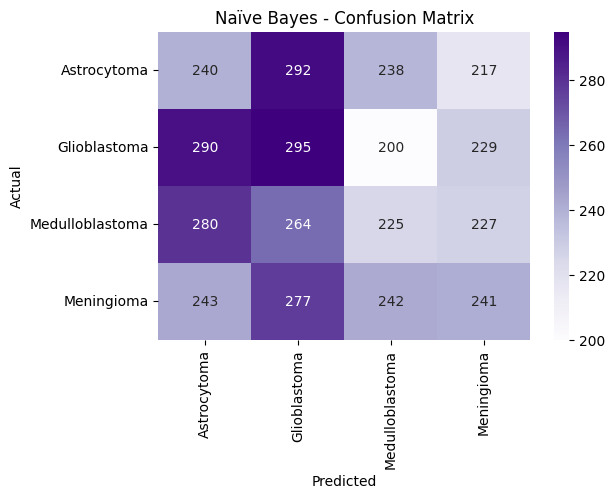

In [14]:
#visualizing confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Naïve Bayes classifier achieved training and testing accuracies of 0.27 and 0.25 respectively, indicating underfitting.

The independence assumption of Naïve Bayes likely fails for this dataset because several clinical features (e.g. Stage, Tumor_Size, MRI_Result) are correlated.

This model therefore performs near random-guess level and is unsuitable for predicting tumor histology